In [1]:
import pandas as pd
from pathlib import Path

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.pipeline import Pipeline
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ROOT = Path.cwd().parent
path_raw = ROOT / "data" / "processed" / "heart_clean.csv"
df = pd.read_csv(path_raw)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
import sys
root = Path.cwd().parent
if str(root) not in sys.path:
    sys.path.append(str(root))

In [5]:
from src.models import (
    baseline,
    randomforest_basemodel,
    svc_basemodel,
    decisiontree_basemodel,
    xgboost_basemodel,
    logistic_regression_optuna,
    random_forest_optuna,
    svc_optuna,
    create_triple_stacking,
    plot_ensemble_importance,
)

In [6]:
# Just using a simple train test split and a baseline model as Logistic Regresion with default parameters
baseline(df, "HeartDisease")

Confusion Matrix:
[[98 13]
 [15 98]]
Score in Training set: 0.8601532567049809
Score in Test set: 0.875

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.88      0.87      0.88       113

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224

ROC-AUC Score: 0.9380


In [7]:
randomforest_basemodel(df, "HeartDisease")

Confusion Matrix:
[[67  4]
 [ 9 70]]
Score in Training set: 1.0
Score in Test set: 0.9133333333333333

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        71
           1       0.95      0.89      0.92        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150

ROC-AUC Score: 0.9583


In [8]:
svc_basemodel(df, "HeartDisease")

Confusion Matrix:
[[66  5]
 [10 69]]
Score in Training set: 0.9010067114093959
Score in Test set: 0.9

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.93      0.87      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

ROC-AUC Score: 0.9551


In [9]:
decisiontree_basemodel(df, "HeartDisease")

Confusion Matrix:
[[64  7]
 [14 65]]
Score in Training set: 1.0
Score in Test set: 0.86

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        71
           1       0.90      0.82      0.86        79

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150

ROC-AUC Score: 0.8621


In [10]:
xgboost_basemodel(df, "HeartDisease")

Confusion Matrix:
[[67  4]
 [13 66]]
Score in Training set: 1.0
Score in Test set: 0.8866666666666667

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        71
           1       0.94      0.84      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

ROC-AUC Score: 0.9472


### WE OBSERVED THAT THERE ARE THRE BASICS MODELS , CONSIDERING THAT THEY ARE CALCULATED EACH ONE DIFERENTLY, THERE IS NO CORRELATION .
WE ARE GOING TO USE A OPTUNA SEARCH TO DETERMINE THE BEST HIPER PARAMETERES , THEN CALCULATED 

In [11]:
params_finales_lr = logistic_regression_optuna(df, "HeartDisease")

[I 2025-12-24 15:50:46,276] A new study created in memory with name: no-name-f36ebaef-2106-438e-bf27-6c28d0afde9d
[I 2025-12-24 15:50:46,384] Trial 0 finished with value: 0.8657146001006037 and parameters: {'C': 0.020678510554593275, 'solver': 'saga', 'penalty_saga': 'l1'}. Best is trial 0 with value: 0.8657146001006037.
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_mod

Confusion Matrix:
[[34  5]
 [ 2 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9537
score in training 0.8688524590163934
score in testing 0.9066666666666666


In [12]:
params_finales_rf = random_forest_optuna(df, "HeartDisease")

[I 2025-12-24 15:51:21,912] A new study created in memory with name: no-name-980b9beb-532f-4786-a523-9ff4aaca964c
[I 2025-12-24 15:51:22,633] Trial 0 finished with value: 0.9208629904426558 and parameters: {'n_estimators': 69, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': None, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9208629904426558.
[I 2025-12-24 15:51:25,882] Trial 1 finished with value: 0.9290895372233401 and parameters: {'n_estimators': 469, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 1 with value: 0.9290895372233401.
[I 2025-12-24 15:51:26,349] Trial 2 finished with value: 0.9222214537223341 and parameters: {'n_estimators': 43, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': None, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9290895372233401.
[I 2025-12-24 15:51:29,167] Trial 3 finished with value: 0.927809356

Confusion Matrix:
[[34  5]
 [ 3 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.87      0.92      0.89        36

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75

ROC-AUC Score: 0.9587
score in training 0.9061102831594635
score in testing 0.8933333333333333


In [13]:
params_finales_svc = svc_optuna(df, "HeartDisease")

[I 2025-12-24 15:51:58,088] A new study created in memory with name: no-name-df3941b1-ade5-442e-8215-abb733ff9f47
[I 2025-12-24 15:51:58,286] Trial 0 finished with value: 0.9201087776659959 and parameters: {'C': 0.4177229256610802, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.9201087776659959.
[I 2025-12-24 15:51:58,585] Trial 1 finished with value: 0.9057595573440643 and parameters: {'C': 0.02576282837902873, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.9201087776659959.
[I 2025-12-24 15:51:58,738] Trial 2 finished with value: 0.8414084507042252 and parameters: {'C': 15.216661619746533, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.9201087776659959.
[I 2025-12-24 15:51:58,920] Trial 3 finished with value: 0.9171742957746479 and parameters: {'C': 1.7172818300465973, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 0.9201087776659959.
[I 2025-12-24 15:51:59,119] Trial 4 finished with value: 0.89238430

--- SVC OPTIMIZADO ---
[[34  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9459
score in training 0.8628912071535022
score in testing 0.9066666666666666


In [15]:
modelo_ensamble_final = create_triple_stacking(
    df=df, 
    target="HeartDisease", 
    params_lr=params_finales_lr, 
    params_rf=params_finales_rf, 
    params_svc=params_finales_svc
)


--- RESULTADOS DEL ENSAMBLE TRIPLE ---
[[34  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9566
Score in testing: 0.9067
Score in training: 0.8927


In [17]:
joblib.dump(modelo_ensamble_final, '../model/modelo_heart_disease_stacking.pkl')

['../model/modelo_heart_disease_stacking.pkl']

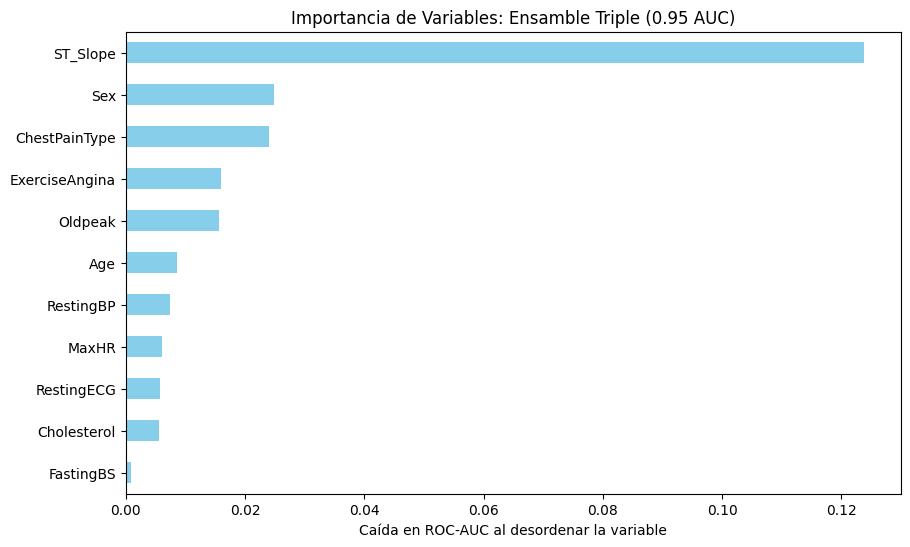

In [18]:
plot_ensemble_importance(modelo_ensamble_final, df.drop(columns=["HeartDisease"]), df["HeartDisease"])